Saving cleaned_ds_salaries.csv to cleaned_ds_salaries.csv
Shape: (607, 11)
Columns: ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
Unique job titles: 50


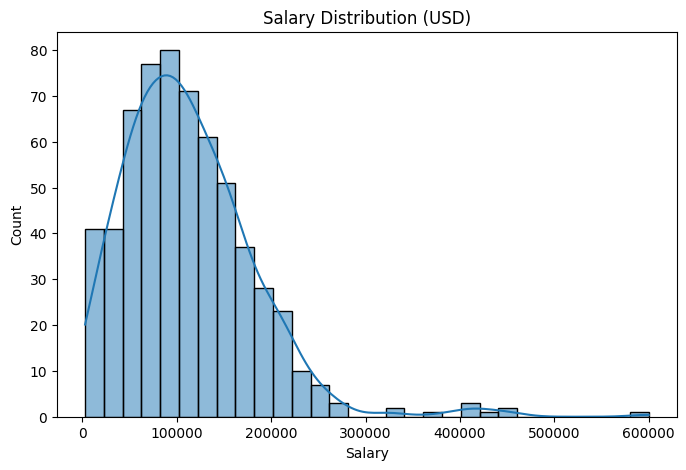

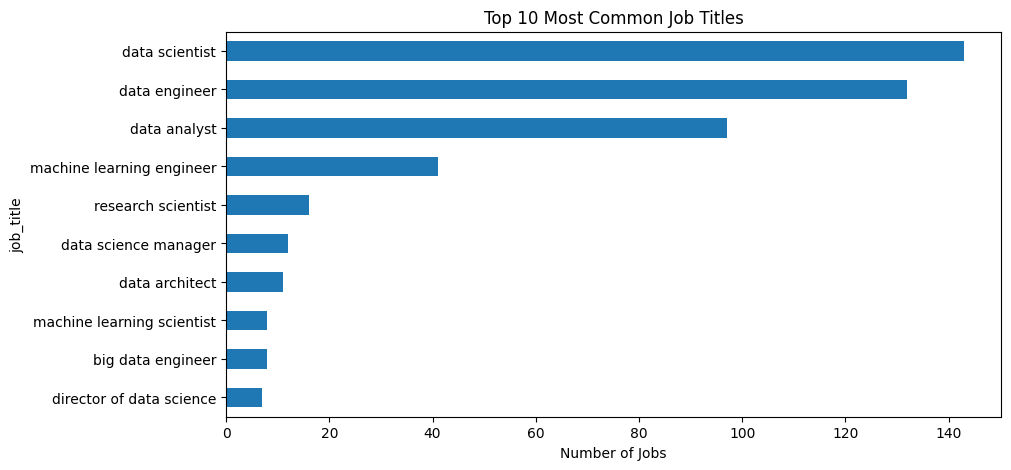

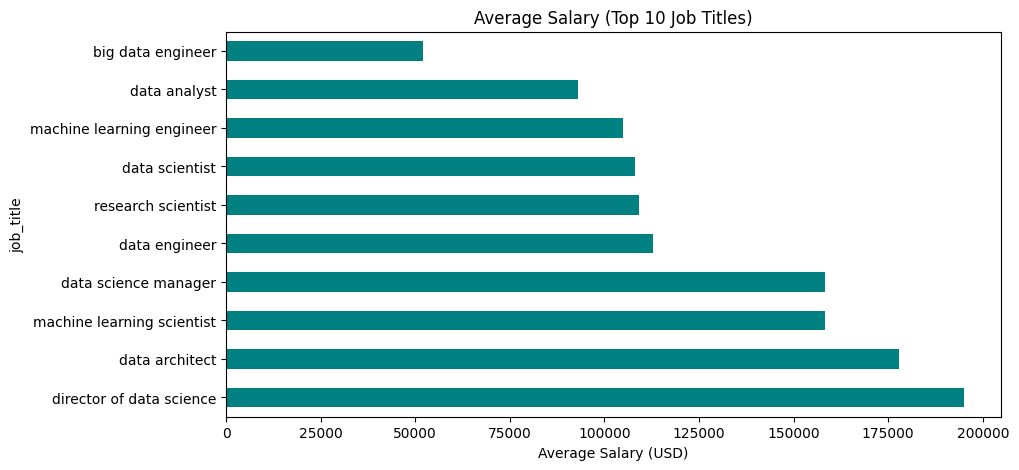

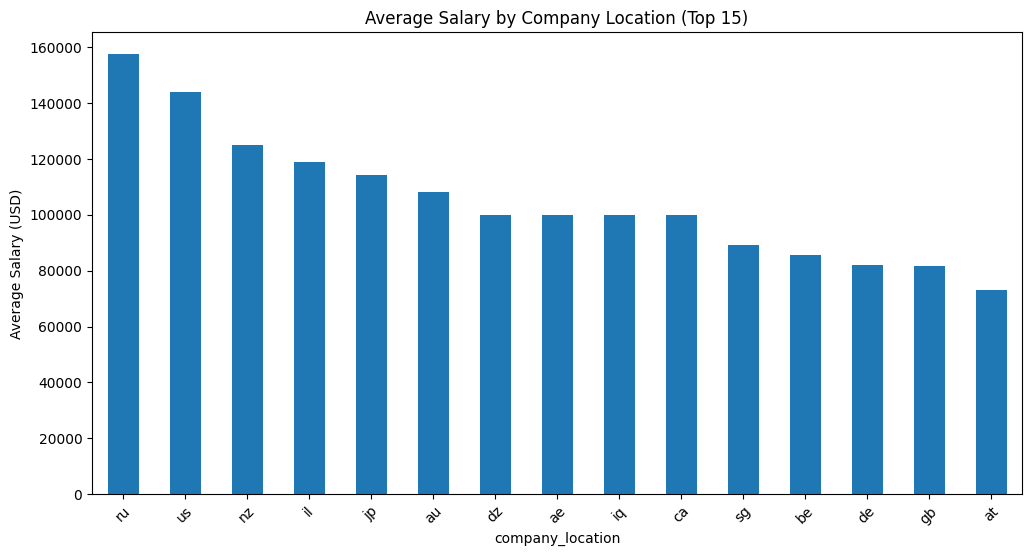

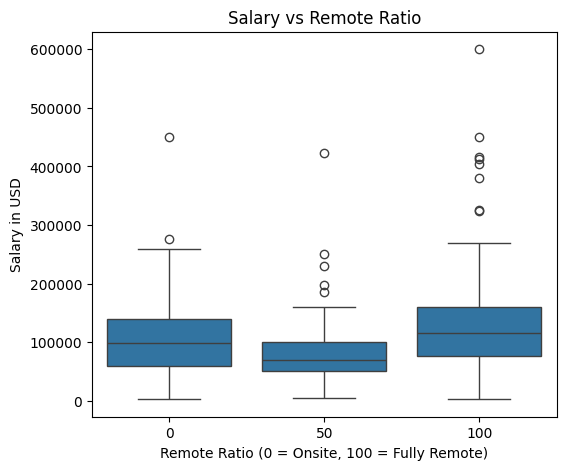

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

#Upload the cleaned CSV
uploaded = files.upload()

#Load the uploaded file
df = pd.read_csv('cleaned_ds_salaries.csv')

#Explore
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Unique job titles:", df['job_title'].nunique())

#1. Salary Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['salary_in_usd'], kde=True, bins=30)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

#2. Top 10 Most Common Job Titles
plt.figure(figsize=(10,5))
df['job_title'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Number of Jobs")
plt.gca().invert_yaxis()
plt.show()

#3. Average Salary by Job Title (Top 10)
top_jobs = df['job_title'].value_counts().head(10).index
avg_salary = df[df['job_title'].isin(top_jobs)].groupby('job_title')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(10,5))
avg_salary.plot(kind='barh', color='teal')
plt.title("Average Salary (Top 10 Job Titles)")
plt.xlabel("Average Salary (USD)")
plt.gca().invert_yaxis()
plt.show()

#4. Average Salary by Company Location
plt.figure(figsize=(12,6))
df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title("Average Salary by Company Location (Top 15)")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45)
plt.show()

#5. Remote vs Onsite Salary Comparison
plt.figure(figsize=(6,5))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title("Salary vs Remote Ratio")
plt.xlabel("Remote Ratio (0 = Onsite, 100 = Fully Remote)")
plt.ylabel("Salary in USD")
plt.show()